# Step 1: Exploratory Data Analysis

---

**Table of Contents**


## 1. Introduction📖 <a id="introduction"></a>

###  1.1 What is Diabetes?


###  1.2 Objective

## 2. Importing the necessary libraries📗<a id='importing'></a> 

In [4]:
# Imports library for data manipulation and visualisation
import sys
sys.path.append("../utilities")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from color import color
import warnings

# ignore all warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

## 3 Loading Dataset& Initial Insight📗<a id='loading'></a> 

In [5]:
df_train = pd.read_csv("../dataset/data_train.csv")
df_test = pd.read_csv("../dataset/data_test.csv")

### 3.1 Dataset Overview

In [6]:
print(color.BOLD + color.RED + "Columns Name:" + color.END)
columns = ', '.join(df_train.columns)
print(columns)

Columns Name:
Id, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income, ExtraMedTest, ExtraAlcoholTest, Status


In [7]:
df_train.dtypes

Id                      int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
ExtraMedTest            int64
ExtraAlcoholTest        int64
Status                  int64
dtype: object

All columns have the datatype int64, as data have been mapped to '0' and '1'. 

In [8]:
def is_binary_categorical(series):
    unique_values = series.unique()
    return len(unique_values) == 2 and set(unique_values) == {0, 1} # Total 2 uniques value and 2 values 0 and 1 

# Identify features with binary categorical data represented only by 0 and 1
binary_categorical_features = [column for column in df_train.columns if is_binary_categorical(df_train[column])]
# Identify remaining numerical features
numerical_features = [column for column in df_train.columns if column not in binary_categorical_features]

bin_count = str(len(binary_categorical_features))
rem_count = str(len(numerical_features))

print(color.BOLD + color.RED +"Features with binary categorical data represented only by 0 and 1 ("+bin_count+"):"+color.END, binary_categorical_features)
print(color.BOLD + color.RED +"Numerical features ("+rem_count+"):"+color.END, numerical_features)

Features with binary categorical data represented only by 0 and 1 (15): ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', 'Status']
Numerical features (10): ['Id', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income', 'ExtraMedTest', 'ExtraAlcoholTest']


In [9]:
print(color.BOLD + color.RED + 'Train Data Overview: ')
df_train.head(5)

Train Data Overview: 


,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,0,1,24,1,0,0,1,0,...,0,0,0,0,8,4,5,60,0,0
1,1,0,0,1,28,0,0,0,1,1,...,1,0,0,0,2,6,8,0,-64,0
2,2,0,0,1,36,1,0,0,1,1,...,30,30,1,0,3,2,1,-46,0,0
3,3,0,1,1,35,0,0,0,1,1,...,0,0,0,0,8,6,8,-83,-188,0
4,4,0,1,1,27,0,0,0,1,0,...,0,0,0,0,9,5,4,-58,0,0


In [10]:
print(color.BOLD + color.BLUE + 'Test Data Overview: ')
df_test.head(5)

Test Data Overview: 


,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,202944,1,1,1,30,1,0,1,1,1,...,3,0,0,1,11,4,7,0,-145,NaN
1,202945,0,0,1,27,1,0,0,0,0,...,0,30,1,1,13,2,5,28,-145,NaN
2,202946,0,0,1,21,0,0,0,1,1,...,0,5,0,0,10,6,8,-26,72,NaN
3,202947,0,0,1,24,1,0,0,1,1,...,0,30,0,0,9,6,7,0,0,NaN
4,202948,1,0,1,34,0,0,0,1,1,...,0,1,1,0,11,4,7,-73,-63,NaN


In [11]:
print(color.BOLD + color.RED + 'Training data shape:' + color.END)
print(df_train.shape)

print(color.BOLD + color.RED + 'Training data Duplication Row Count: ' + color.END)
print(df_train.duplicated().sum())

print(color.BOLD + color.RED +'Training data Duplication ID Count: ' + color.END)
print(df_train.duplicated(subset='Id').sum())

print(color.BOLD + color.RED +'Training data Null Value Count:' + color.END)
print(df_train.isna().sum())

Training data shape:
(202944, 25)
Training data Duplication Row Count: 
0
Training data Duplication ID Count: 
0
Training data Null Value Count:
Id                      0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
ExtraMedTest            0
ExtraAlcoholTest        0
Status                  0
dtype: int64


Training dataset does not contain any null value for all features. So we do not need to do any data preprocessing to eliminate for modify the null value.

In [12]:
print(color.BOLD + color.BLUE + 'Test data shape:' + color.END)
print(df_test.shape)

print(color.BOLD + color.BLUE + 'Test data Duplication Row Count: ' + color.END)
print(df_test.duplicated().sum())

print(color.BOLD + color.BLUE +'Test data Duplication ID Count: ' + color.END)
print(df_test.duplicated(subset='Id').sum())

print(color.BOLD + color.BLUE +'Test data Null Value Count:' + color.END)
print(df_test.isna().sum())

Test data shape:
(50736, 25)
Test data Duplication Row Count: 
0
Test data Duplication ID Count: 
0
Test data Null Value Count:
Id                          0
HighBP                      0
HighChol                    0
CholCheck                   0
BMI                         0
Smoker                      0
Stroke                      0
HeartDiseaseorAttack        0
PhysActivity                0
Fruits                      0
Veggies                     0
HvyAlcoholConsump           0
AnyHealthcare               0
NoDocbcCost                 0
GenHlth                     0
MentHlth                    0
PhysHlth                    0
DiffWalk                    0
Sex                         0
Age                         0
Education                   0
Income                      0
ExtraMedTest                0
ExtraAlcoholTest            0
Status                  50736
dtype: int64


The test dataset doesn't have value for status, as this will be used to make the prediction and marked

In [13]:
df_train.describe()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,...,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000
mean,101471.500000,0.428700,0.424344,0.962655,28.379824,0.442634,0.040844,0.094391,0.756302,0.635372,...,3.196971,4.256455,0.168707,0.439545,8.037449,5.050245,6.055641,-7.408660,-7.560041,0.175571
std,58585.030853,0.494891,0.494244,0.189607,6.612738,0.496700,0.197929,0.292372,0.429313,0.481327,...,7.427247,8.736665,0.374494,0.496333,3.051568,0.985601,2.070140,75.993743,75.927137,0.380455
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-199.000000,-199.000000,0.000000
25%,50735.750000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,-55.000000,-55.000000,0.000000
50%,101471.500000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000,0.000000
75%,152207.250000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,40.000000,40.000000,0.000000
max,202943.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,199.000000,199.000000,1.000000


In [14]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,202944.0,101471.500000,58585.030853,0.0,50735.75,101471.5,152207.25,202943.0
HighBP,202944.0,0.428700,0.494891,0.0,0.00,0.0,1.00,1.0
HighChol,202944.0,0.424344,0.494244,0.0,0.00,0.0,1.00,1.0
CholCheck,202944.0,0.962655,0.189607,0.0,1.00,1.0,1.00,1.0
BMI,202944.0,28.379824,6.612738,12.0,24.00,27.0,31.00,98.0
Smoker,202944.0,0.442634,0.496700,0.0,0.00,0.0,1.00,1.0
Stroke,202944.0,0.040844,0.197929,0.0,0.00,0.0,0.00,1.0
HeartDiseaseorAttack,202944.0,0.094391,0.292372,0.0,0.00,0.0,0.00,1.0
PhysActivity,202944.0,0.756302,0.429313,0.0,1.00,1.0,1.00,1.0
Fruits,202944.0,0.635372,0.481327,0.0,0.00,1.0,1.00,1.0


### 3.2 Dataset Distribution

                       Male  Female   Total
With Diabetes (1)     16591   19040   35631
Without Diabetes (0)  72612   94701  167313

Percentage of people with diabetes:
Male: 18.60%
Female: 16.74%
Total: 17.56%


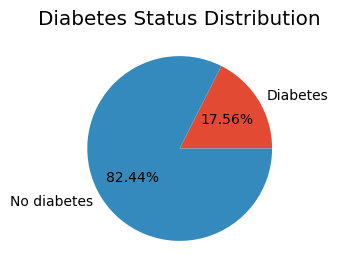

In [15]:
import pandas as pd

# Assuming your dataframe is named df

# Count males with and without diabetes
male_counts = df_train[df_train['Sex'] == 1]['Status'].value_counts().sort_index()

# Count females with and without diabetes
female_counts = df_train[df_train['Sex'] == 0]['Status'].value_counts().sort_index()

# Create a DataFrame
data = {
    'Male': [male_counts[1], male_counts[0]],
    'Female': [female_counts[1], female_counts[0]]
}

index = ['With Diabetes (1)', 'Without Diabetes (0)']

df_counts = pd.DataFrame(data, index=index)

df_counts['Total'] = df_counts.sum(axis=1)

print(df_counts)

total_diabetes = male_counts[0] + male_counts[1] + female_counts[0] + female_counts[1]
print()
print(color.BOLD + color.RED + "Percentage of people with diabetes:" + color.END)
print("Male: {:.2f}%".format(male_counts[1]/ (male_counts[1]+male_counts[0]) * 100))
print("Female: {:.2f}%".format(female_counts[1]/ (female_counts[1]+female_counts[0]) * 100))
print("Total: {:.2f}%".format((male_counts[1]+female_counts[1])/total_diabetes * 100))

# Pie Graph
labels = ['Diabetes', 'No diabetes']
sizes = [male_counts[1]+female_counts[1], total_diabetes- (male_counts[1]+female_counts[1])]
plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%.2f%%')
plt.title('Diabetes Status Distribution')
plt.show()


The percentage of a person getting diabetes or prediabetes vary between 16.74% ~ 18.60%, with the avarage value of 17,56%, which is a very small difference between male and female. We can conclude that sex, is likely not a big factor that contribute to a person getting diabetes.

However, the dataset is heavily imbalance, where it is made up of **17.56% (1)** and **82.44% (0)**. This imbalanced will cause a bias toward the majority class for the prediction result, which likely to produce very high accuracy in training, but not performing well in the real world.  

To handle this imbalance dataset problem, there are 3 techniques we can apply:
- Over Sampling:
 - Random Oversampling 
 - SMOTE (Synthetic Minority Oversampling Technique)
- Under Sampling
------------
Undersampling techniques randomly removing data from the majority class to achieve balance, and reduce computational power, but it produce alot of information loss in this case where majority class is overwhelm, and will introduce underfitting

Oversampling techniques generate new values for the minority class to balance out the dataset, this approach will not discard any datapoint and retain all information present in the original dataset. However it may increase computational cost. There are 2 techiniques Random Oversampling and SMOTE. 

Random Oversampling is simpler to implement, it replicate random data from the dataset, increase the dataset, but keep the variety. So there is risk of overfitting, if done excessiely

SMOTE generate new data based on existing minority samples, it can resolve overfitting issue, increase model genaralization, but potentially introducing noise. So it is more complex to implement and required carful parameter selection and finetuning.

------------
-> Given the big imbalance, we should oversampling the minority class and undersampling the majority class simultaneously, so it's possible to achieve better class balance while minimizing the risk of overfitting or underfitting.
And benchmark the performance of both Random oversampling vs SMOTE

In [16]:
import pandas as pd

# Assuming your dataframe is named df

# Define the conditions
conditions = ['HighBP', 'HighChol', 'Smoker', 'Sex', 'Fruits', 'PhysActivity']

# Initialize an empty dictionary to store counts
counts = {}

# Loop through conditions to count males and females with and without each condition
for condition in conditions:
    # Count all individuals with and without the condition
    condition_counts = df_train[condition].value_counts().sort_index()
    # Store the counts in the dictionary
    counts[condition] = [condition_counts[1], condition_counts[0]]

# Create a DataFrame
df_counts = pd.DataFrame(counts, index=['Yes', 'No'])

print(df_counts)


     HighBP  HighChol  Smoker     Sex  Fruits  PhysActivity
Yes   87002     86118   89830   89203  128945        153487
No   115942    116826  113114  113741   73999         49457


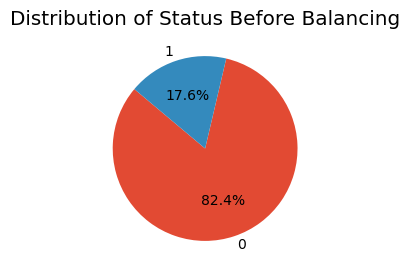

(202944, 25)

In [17]:
counts = df_train['Status'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Status Before Balancing')
plt.show()

df_train.shape

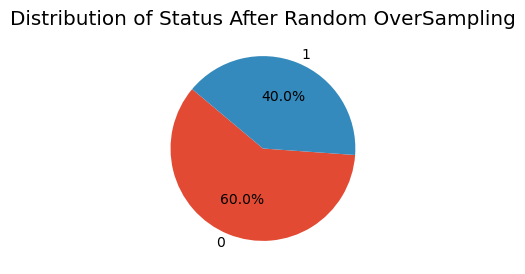

Rows reduced: 35682


In [18]:
# Assuming X_train and y_train are your feature matrix and target vector respectively
x_train = df_train.drop('Status', axis=1)  # Assuming 'Status' is your target variable
y_train = df_train['Status']

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42, sampling_strategy=0.4)
rus = RandomUnderSampler(random_state=42, sampling_strategy=0.667)

# Perform random oversampling
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

# Reconstruct DataFrame with resampled data
sampled_df = pd.DataFrame(x_train_resampled, columns=x_train.columns)
sampled_df['Status'] = y_train_resampled

# Under Sampler
x_train = sampled_df.drop('Status', axis=1)  
y_train = sampled_df['Status']

x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)

hybridRandomSampled_df = pd.DataFrame(x_train_resampled, columns=x_train.columns)
hybridRandomSampled_df['Status'] = y_train_resampled

counts = hybridRandomSampled_df['Status'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(3, 3))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Status After Random OverSampling')
plt.show()

hybridRandomSampled_df.shape

print(color.RED + color.BOLD + "Rows reduced: " + color.END + str((df_train.shape[0] - hybridRandomSampled_df.shape[0])))

I oversampled the minority class to match 40% of the majority class, and then undersampled the majority class by 66.7%, so we have a distribution of **40% (minority) and 60% (majority)**, which is the minimum acceptable rate for a dataset to be balanced. By this we can prevent losing as much information from the majority class as possible. In this case our balanced dataset have **35682** less rows than the original dataset.


Index(['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex',
       'Status'],
      dtype='object')


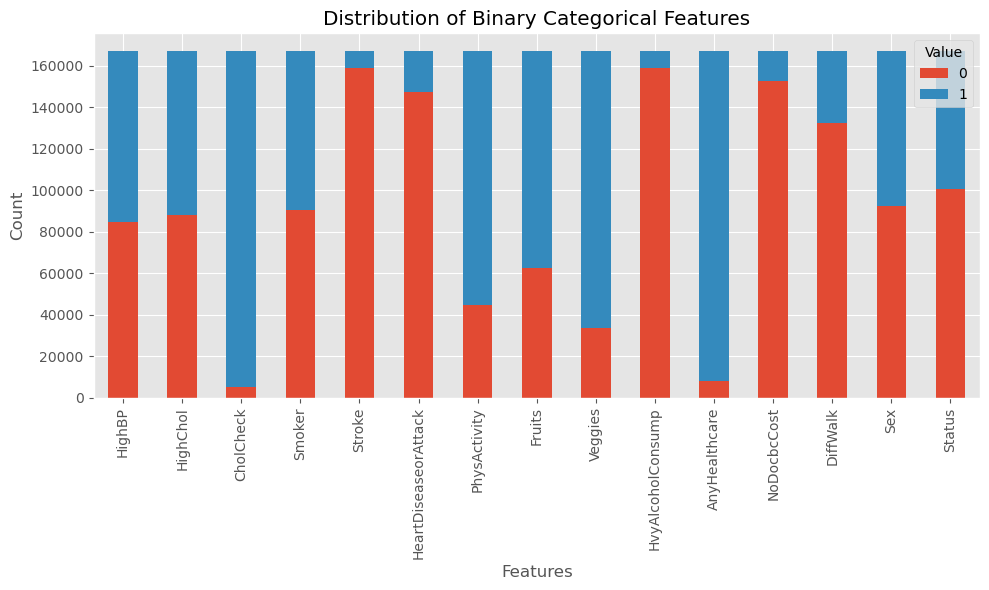

In [19]:

# Assuming binary_categorical_features is a list of column names containing binary categorical data

# Count occurrences of each category for all binary categorical features
binary_counts = hybridRandomSampled_df[binary_categorical_features].apply(pd.value_counts)

print(binary_counts.columns)

# Transpose the DataFrame for plotting
binary_counts = binary_counts.transpose()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
binary_counts.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Distribution of Binary Categorical Features')
ax.set_xlabel('Features')
ax.set_ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Value', loc='upper right')
plt.tight_layout()
plt.show()


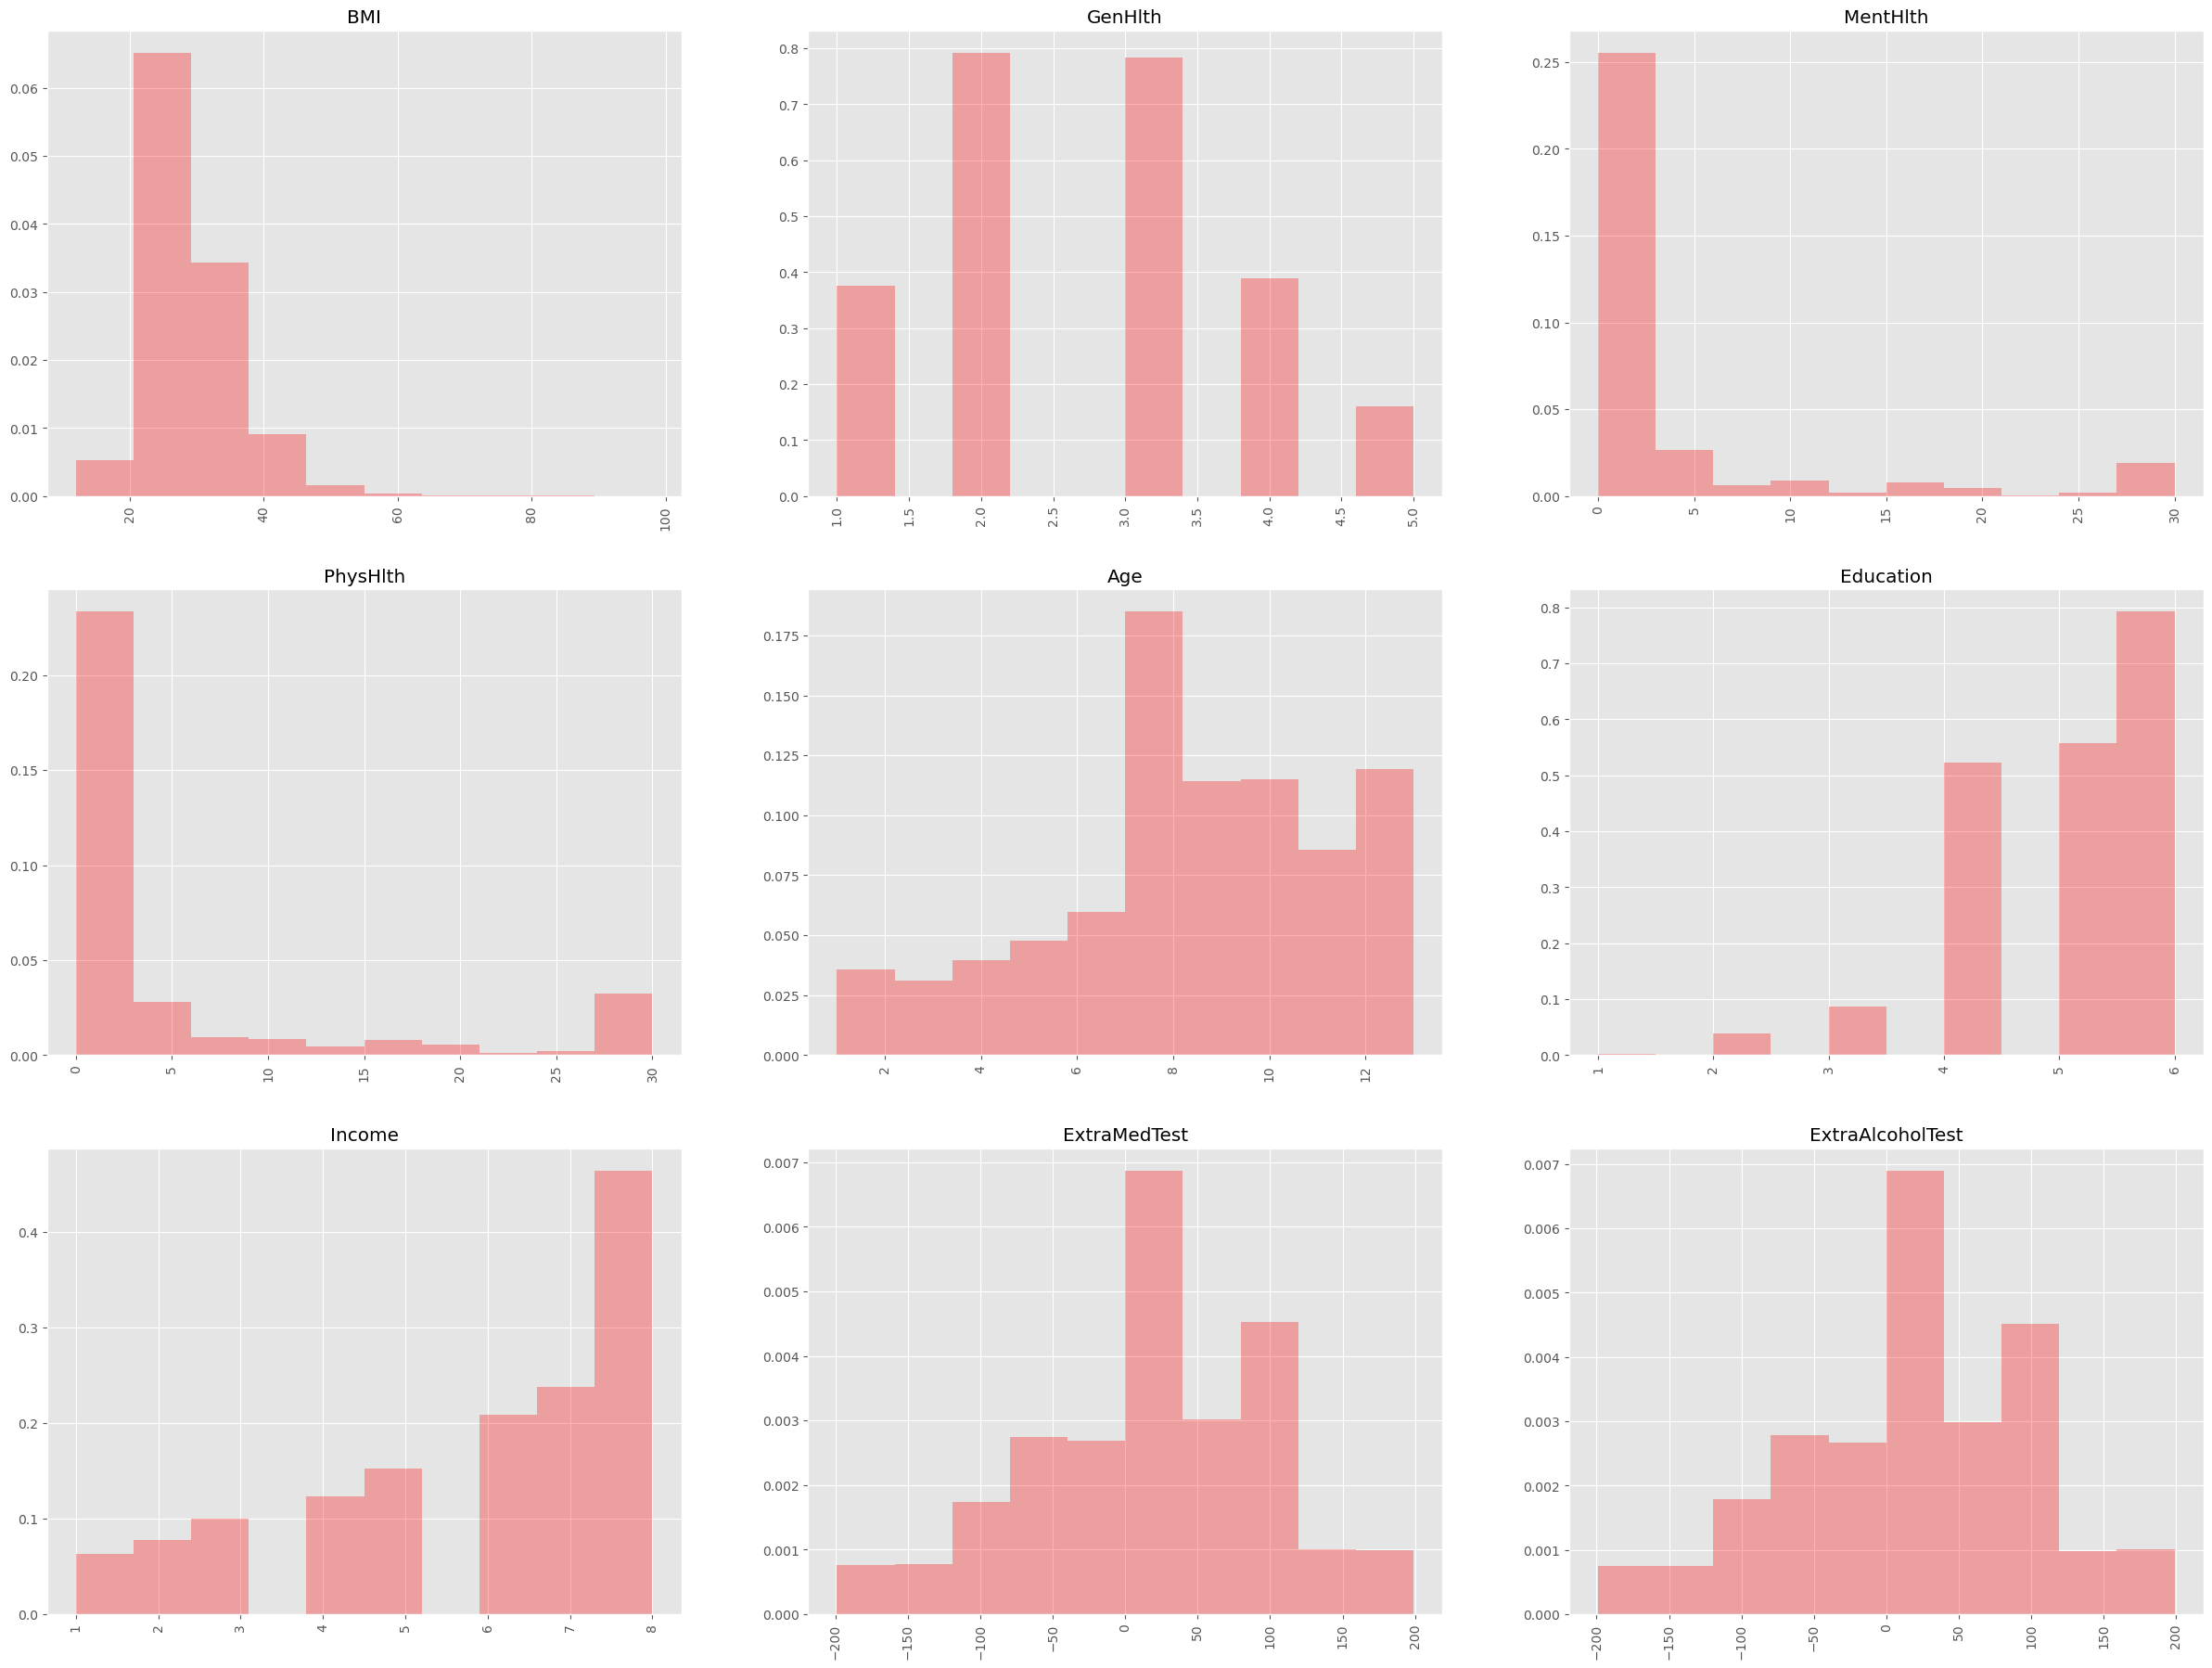

In [20]:
plt.figure(figsize=(30,30))
count = 0
for i, col in enumerate(hybridRandomSampled_df.columns):
    if col not in binary_categorical_features and col != "Id":
        plt.subplot(4,3,count+1)
        plt.hist(hybridRandomSampled_df[col], alpha=0.3, color='r', density=True)
        plt.title(col)
        plt.xticks(rotation='vertical')
        count +=  1


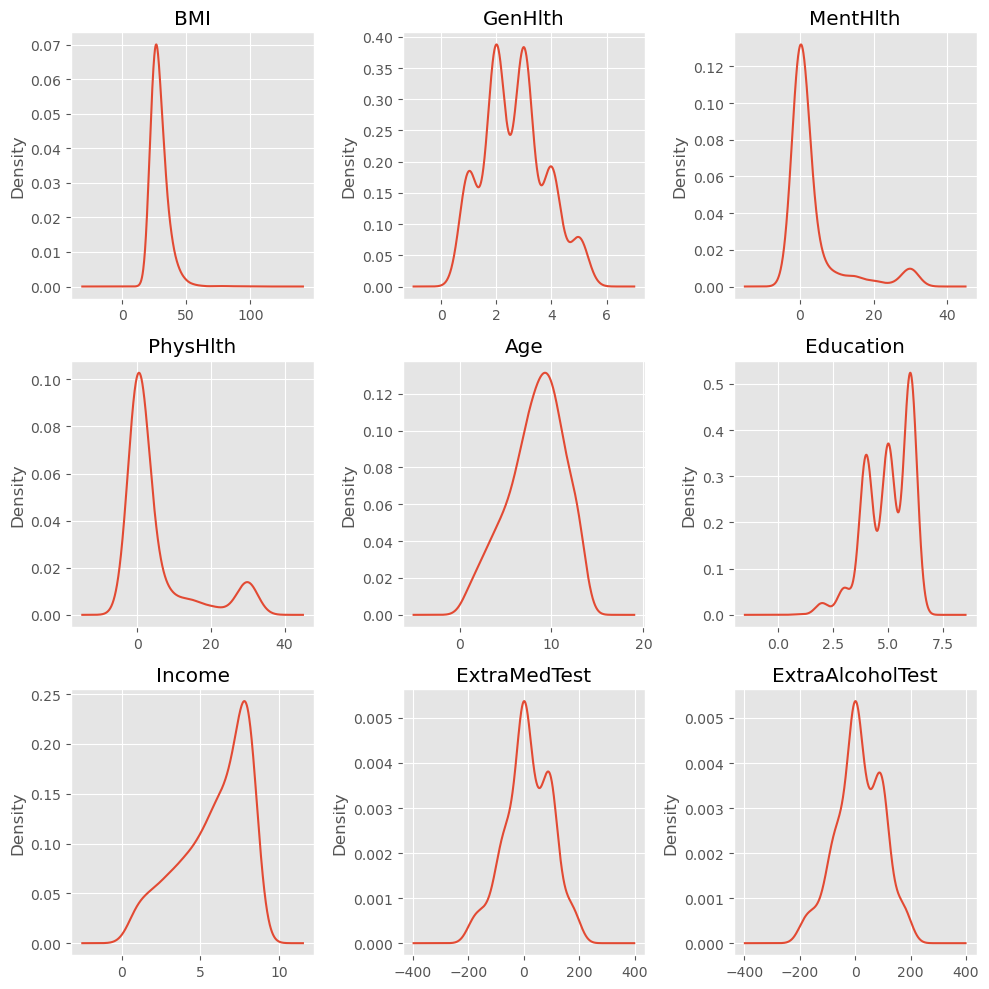

In [21]:
numeric_df = hybridRandomSampled_df[numerical_features]
numeric_df = numeric_df.drop("Id", axis=1)

fig, ax = plt.subplots(3, 3, figsize=(10, 10))
row = col = 0

for n, i in enumerate(numeric_df.columns):
    if (n % 3 == 0) and (n > 0):
        row += 1
        col = 0
    numeric_df[i].plot(kind="kde", ax=ax[row, col], bw_method=0.3)
    ax[row, col].set_title(i)
    col += 1

plt.tight_layout()
plt.show()


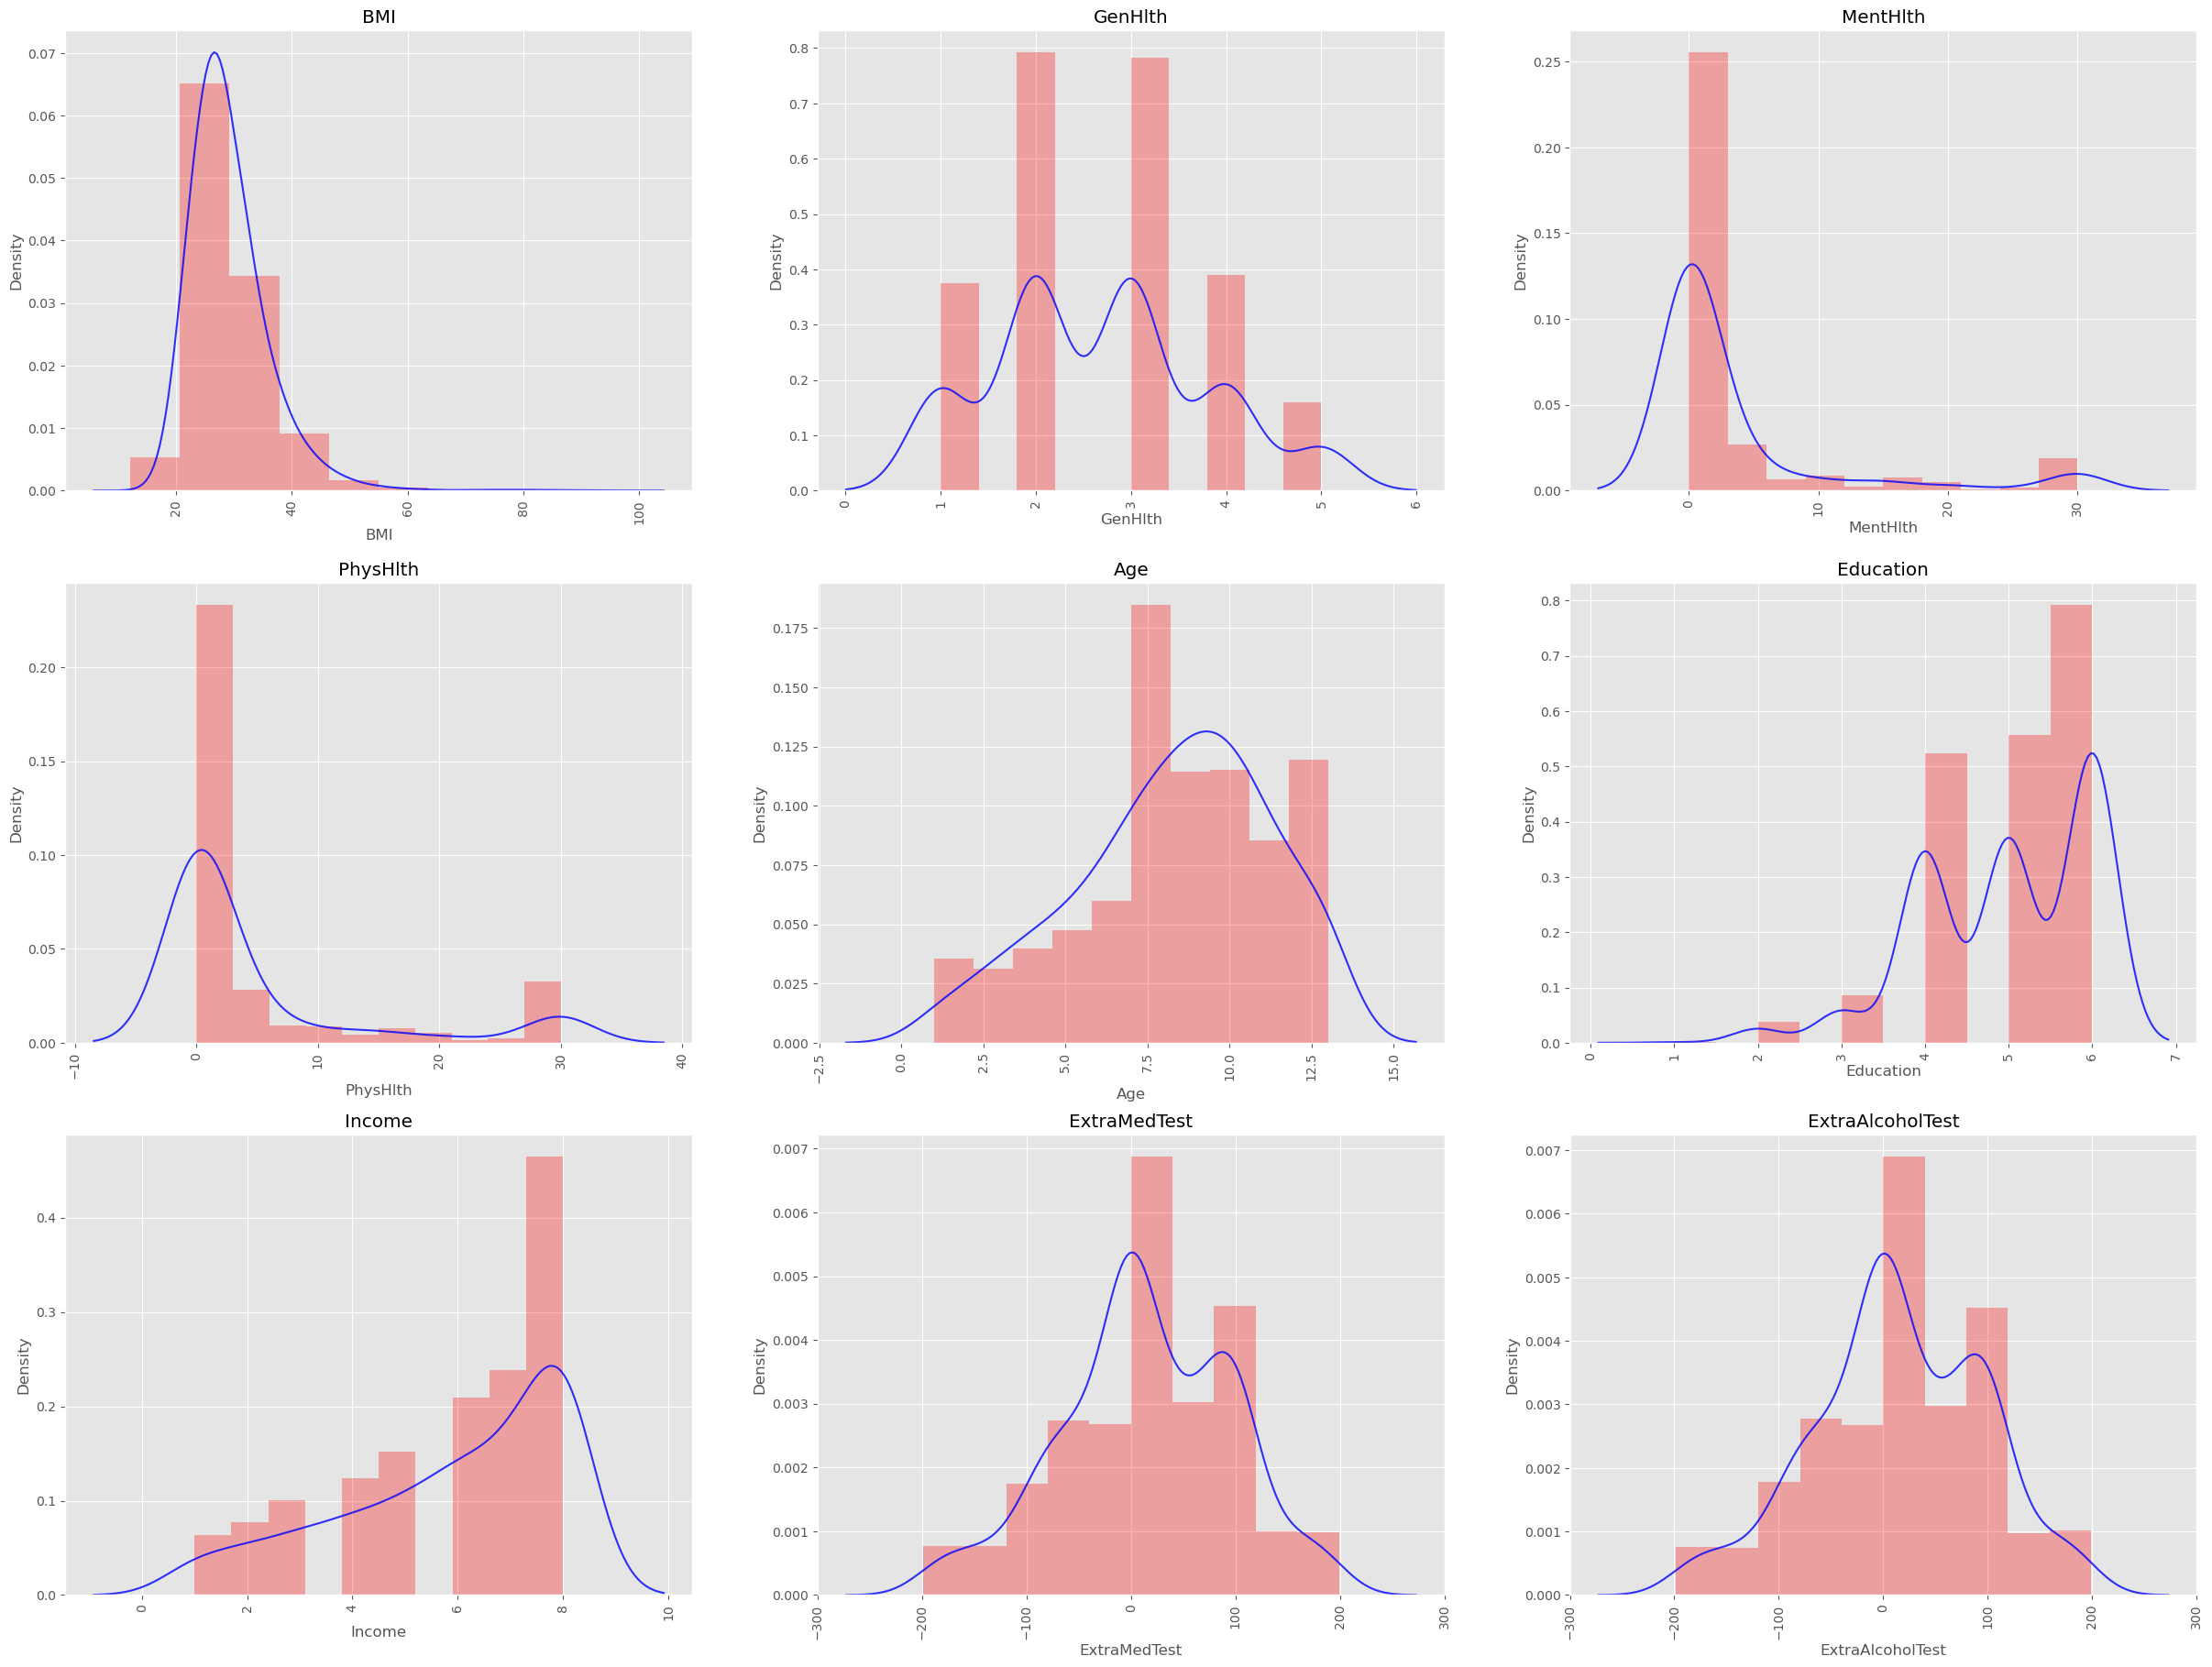

In [22]:
plt.figure(figsize=(30,30))
count = 0
for i, col in enumerate(hybridRandomSampled_df.columns):
    if col not in binary_categorical_features and col != "Id":
        plt.subplot(4,3,count+1)
        plt.hist(hybridRandomSampled_df[col], alpha=0.3, color='r', density=True)
        plt.title(col)
        plt.xticks(rotation='vertical')
        count += 1
        sns.kdeplot(hybridRandomSampled_df[col], color="blue", alpha=0.8, bw_method=0.3)